In [ ]:
!nvidia-smi

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from glob import glob
from sklearn.metrics import accuracy_score
import glob
import os
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
batch_size = 32
img_height = 64
img_width = 64
img_size = [64, 64]
img_dir = '/content/drive/MyDrive/Thesis/plantvillage/' 

In [5]:
size = 64

images = []
labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Thesis/plantvillage/*"):
  label = directory_path.split("\\")[-1]
  for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (size, size))
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    images.append(img)
    labels.append(label)

images = np.array(images)
labels = np.array(labels)

In [6]:
#save in array
np.save('tam_images_array', images)
np.save('tam_labels_array', labels)

In [ ]:
images = np.load('/content/drive/MyDrive/Thesis/malaria data array/images_array.npy')
labels = np.load('/content/drive/MyDrive/Thesis/malaria data array/labels_array.npy')

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)
labels_encoded = le.transform(labels)

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=0)

In [25]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

inputs = tf.keras.Input(shape=img_size + [3])

x = Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(inputs)
x = MaxPooling2D((3, 3), strides=2, padding='same')(x)
x = BatchNormalization()(x)

x = Conv2D(64, (3, 3), strides=2, padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=2, padding='same')(x)
x = BatchNormalization()(x)

x = Conv2D(64, (3, 3), strides=2, padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=2, padding='same')(x)
x = BatchNormalization()(x)

x = Conv2D(32, (3, 3), strides=1, padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=2, padding='same')(x)
x = BatchNormalization()(x)

x = Flatten()(x)
x = Dense(units=1024, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.2)(x)
prediction1 = Dense(units=10, activation='softmax')(x)

model1 = Model(inputs=inputs, outputs=prediction1)


from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)

model1.compile(
    optimizer=opt,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


In [26]:
# fit the model

epochs_num=20

history1 = model1.fit(
  x_train,
  y_train,
  epochs=epochs_num,
  validation_split=0.1
)

Epoch 1/20
325/325 [==============================] - 9s 23ms/step - loss: 1.1656 - accuracy: 0.6158 - val_loss: 0.7921 - val_accuracy: 0.7251
Epoch 2/20
325/325 [==============================] - 7s 22ms/step - loss: 0.5789 - accuracy: 0.8052 - val_loss: 0.5857 - val_accuracy: 0.7875
Epoch 3/20
325/325 [==============================] - 7s 22ms/step - loss: 0.4211 - accuracy: 0.8530 - val_loss: 0.4521 - val_accuracy: 0.8335
Epoch 4/20
325/325 [==============================] - 7s 22ms/step - loss: 0.3219 - accuracy: 0.8840 - val_loss: 0.3941 - val_accuracy: 0.8699
Epoch 5/20
325/325 [==============================] - 7s 22ms/step - loss: 0.2603 - accuracy: 0.9082 - val_loss: 0.3931 - val_accuracy: 0.8534
Epoch 6/20
325/325 [==============================] - 7s 22ms/step - loss: 0.2010 - accuracy: 0.9335 - val_loss: 0.3233 - val_accuracy: 0.8933
Epoch 7/20
325/325 [==============================] - 7s 22ms/step - loss: 0.1800 - accuracy: 0.9372 - val_loss: 0.5391 - val_accuracy: 0.8274

In [27]:
model1_pred = model1.predict(x_test)
model1_pred = np.argmax(model1_pred, axis=1)
accuracy = accuracy_score(y_test, model1_pred)
print(accuracy)

0.8913571676501215


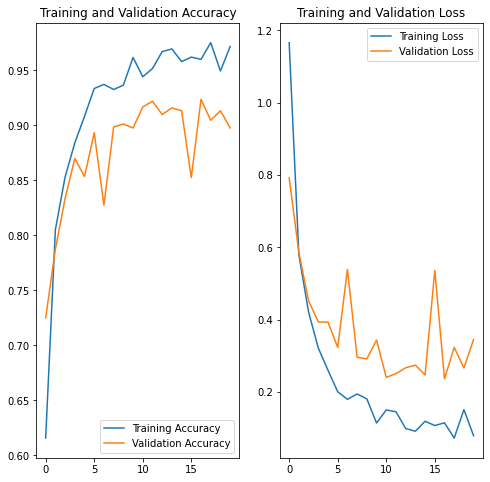

In [28]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs_num)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()